<a href="https://colab.research.google.com/github/thawnglong/Projects-Portfolio/blob/main/E_commerce_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ready

In [ ]:
from google.colab import drive
drive.mount('E-commerce')

Mounted at E-commerce


In [ ]:
#import relevent library and dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import datetime as dt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
porter = PorterStemmer()
porter.stem("changing")
stops = stopwords.words("english")
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/E-commerce/MyDrive/E-commerce/data.csv', encoding= 'unicode_escape')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install squarify

import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)

In [ ]:
!pip install nb_black
!pip install plotly
!pip install lifetimes
import os
from operator import attrgetter
import plotly.graph_objs as go
from plotly.offline import iplot
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
sns.set_style('whitegrid')
palette = 'Set2'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.5 MB/s eta 0:00:00


# Data Cleaning & EDA


In [ ]:
#check data
def hello_data():
    print("-"*20)
    print("Shape of the dataset")
    print("-"*20)
    print(str(df.shape) + "\n")
    print("Columns of the dataset")
    print("-"*20)
    print(str(df.columns.to_list()) + "\n")
    print("Data duplication ")
    print("-"*20)
    print(str(df.duplicated(keep=False).sum()) + "\n")
    print("Missing Values")
    print("-"*20)
    print(str(df.isnull().sum()) + "\n")
    print("Unique Values")
    print("-"*20)
    print(str(df.nunique()) + "\n")
    print("Columns info")
    print("-"*20)
    print(str(df.info()) + "\n")
    print("-"*20)

In [ ]:
hello_data()

--------------------
Shape of the dataset
--------------------
(541909, 8)

Columns of the dataset
--------------------
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Data duplication 
--------------------
10147

Missing Values
--------------------
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Unique Values
--------------------
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

Columns info
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   Stock

In [ ]:
#invoice date to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
# check value
df[["Quantity","UnitPrice"]].describe()

Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

In [ ]:
#Negative value in both columns

In [ ]:
#null value on decription
df.loc[df.Description.isnull()]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622       536414     22139         NaN        56 2010-12-01 11:52:00   
1970      536545     21134         NaN         1 2010-12-01 14:32:00   
1971      536546     22145         NaN         1 2010-12-01 14:33:00   
1972      536547     37509         NaN         1 2010-12-01 14:33:00   
1987      536549    85226A         NaN         1 2010-12-01 14:34:00   
...          ...       ...         ...       ...                 ...   
535322    581199     84581         NaN        -2 2011-12-07 18:26:00   
535326    581203     23406         NaN        15 2011-12-07 18:31:00   
535332    581209     21620         NaN         6 2011-12-07 18:35:00   
536981    581234     72817         NaN        27 2011-12-08 10:33:00   
538554    581408     85175         NaN        20 2011-12-08 14:06:00   

        UnitPrice  CustomerID         Country  
622           0.0         NaN  United Kingdom  
1970          0.0         NaN  United Kingdom  
1971          0.0         NaN  United Kingdom  
1972          0.0         NaN  United Kingdom  
1987          0.0         NaN  United Kingdom  
...           ...         ...             ...  
535322        0.0         NaN  United Kingdom  
535326        0.0         NaN  United Kingdom  
535332        0.0         NaN  United Kingdom  
536981        0.0         NaN  United Kingdom  
538554        0.0         NaN  United Kingdom  

[1454 rows x 8 columns]

In [ ]:
df.loc[df.Description.isnull(),["UnitPrice","Quantity"]].describe()

UnitPrice     Quantity
count     1454.0  1454.000000
mean         0.0    -9.359697
std          0.0   243.238758
min          0.0 -3667.000000
25%          0.0   -24.000000
50%          0.0    -3.000000
75%          0.0     4.000000
max          0.0  5568.000000

In [ ]:
#all unitprice values = 0
# drop all description null values

In [ ]:
#CustomerID have lots of missing values and dtype = float, fill with 0.0
df = df.dropna()

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df[["Quantity", "UnitPrice"]].describe()

Quantity      UnitPrice
count  406829.000000  406829.000000
mean       12.061303       3.460471
std       248.693370      69.315162
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000

In [ ]:
#drop all negaive values
df = df[df["Quantity"]>0]
df = df[df["UnitPrice"]>0]

In [ ]:
# nan values check
nan_description = df['Description'].str.contains('nan').sum()
nan_stock = df['StockCode'].str.contains('nan').sum()
nan_invoice = df['InvoiceNo'].str.contains('nan').sum()
print( "{} 'nan' exists in the dataframe.".format(nan_description+nan_stock+nan_invoice))

0 'nan' exists in the dataframe.


In [ ]:
# Empty strings check
empty_description = df[~df.Description.str.contains('\w')].Description.count()
empty_stock = df[~df.Description.str.contains('\w')].Description.count()
empty_invoice = df[~df.Description.str.contains('\w')].Description.count()
print( "{} 'Empty String' exists in the dataframe.".format(empty_description+empty_stock+empty_invoice))

0 'Empty String' exists in the dataframe.


In [ ]:
df[["Quantity", "UnitPrice"]].describe()

Quantity      UnitPrice
count  397884.000000  397884.000000
mean       12.988238       3.116488
std       179.331775      22.097877
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000

In [ ]:
#detect outlier, should drop or not

<Axes: xlabel='Quantity'>

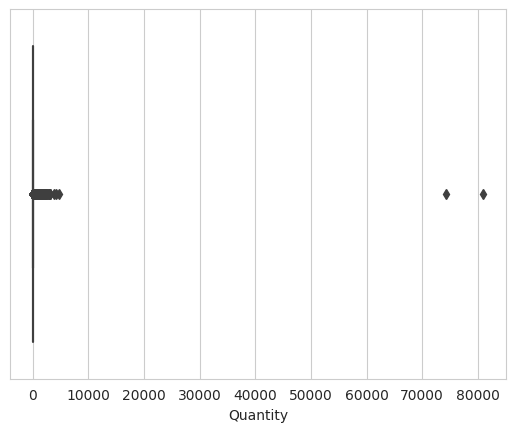

In [ ]:
sns.boxplot(df,x= "Quantity")

<Axes: xlabel='UnitPrice'>

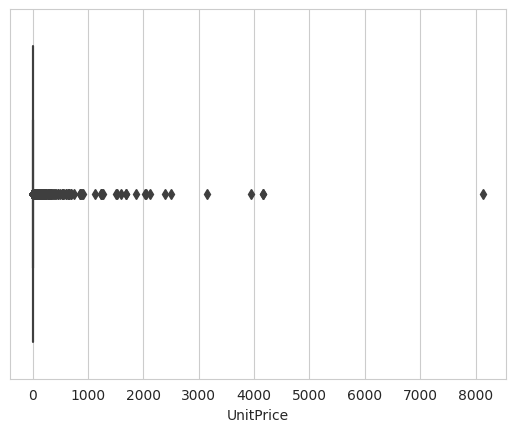

In [ ]:
sns.boxplot(df,x= "UnitPrice")

In [ ]:
df[df['Quantity']>70000]
#nothing strange

InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  
61619  2011-01-18 10:01:00       1.04     12346.0  United Kingdom  
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom

In [ ]:
df[df['UnitPrice']>3000]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
173382    551697      POST     POSTAGE         1 2011-05-03 13:46:00   
374542    569382         M      Manual         1 2011-10-03 16:44:00   
406406    571751         M      Manual         1 2011-10-19 11:18:00   
422351    573077         M      Manual         1 2011-10-27 14:13:00   
422376    573080         M      Manual         1 2011-10-27 14:20:00   

        UnitPrice  CustomerID         Country  
173382    8142.75     16029.0  United Kingdom  
374542    3155.95     15502.0  United Kingdom  
406406    3949.32     12744.0       Singapore  
422351    4161.06     12536.0          France  
422376    4161.06     12536.0          France

In [ ]:
#drop fee n bad dept
df = df[df["StockCode"].isin(["POST","BANK CHARGES"])==False]

In [ ]:
df['canceled'] = list(map(lambda x: 'C' in str(x), df['InvoiceNo']))
canceled_orders = df[df['canceled'] == True]
canceled_orders.head()

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, canceled]
Index: []

In [ ]:
#stock code = M
df[df["StockCode"] == "M"]


InvoiceNo StockCode Description  Quantity         InvoiceDate  \
2239      536569         M      Manual         1 2010-12-01 15:35:00   
2250      536569         M      Manual         1 2010-12-01 15:35:00   
6798      536981         M      Manual         2 2010-12-03 14:26:00   
7976      537077         M      Manual        12 2010-12-05 11:59:00   
8530      537137         M      Manual        36 2010-12-05 12:43:00   
...          ...       ...         ...       ...                 ...   
526015    580645         M      Manual         1 2011-12-05 13:11:00   
526018    580646         M      Manual       800 2011-12-05 13:13:00   
530876    580884         M      Manual         1 2011-12-06 12:21:00   
531432    580956         M      Manual         4 2011-12-06 14:23:00   
538321    581405         M      Manual         3 2011-12-08 13:50:00   

        UnitPrice  CustomerID         Country  canceled  
2239         1.25     16274.0  United Kingdom     False  
2250        18.95     16274.0  United Kingdom     False  
6798         0.85     14723.0  United Kingdom     False  
7976         0.42     17062.0  United Kingdom     False  
8530         0.85     16327.0  United Kingdom     False  
...           ...         ...             ...       ...  
526015     219.50     17857.0  United Kingdom     False  
526018       0.25     17857.0  United Kingdom     False  
530876       0.85     15907.0  United Kingdom     False  
531432       1.25     17841.0  United Kingdom     False  
538321       0.42     13521.0  United Kingdom     False  

[284 rows x 9 columns]

In [ ]:
special_stock_code = df[df['StockCode'].apply(lambda x: len(x) == 1)]
special_stock_code.StockCode.value_counts()

M    284
Name: StockCode, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396773 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396773 non-null  object        
 1   StockCode    396773 non-null  object        
 2   Description  396773 non-null  object        
 3   Quantity     396773 non-null  int64         
 4   InvoiceDate  396773 non-null  datetime64[ns]
 5   UnitPrice    396773 non-null  float64       
 6   CustomerID   396773 non-null  float64       
 7   Country      396773 non-null  object        
 8   canceled     396773 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
df['InvoiceNo'].nunique()

18469

# Analyze

## Summary

In [ ]:
#time period
df["InvoiceDate"] = pd.to_datetime(df.InvoiceDate, cache=True)
print ("Start: "+ str(df.InvoiceDate.min()))
print ("End: "+ str(df.InvoiceDate.max()))
print ("Period: " +str(df.InvoiceDate.max() - df.InvoiceDate.min()))

Start: 2010-12-01 08:26:00
End: 2011-12-09 12:50:00
Period: 373 days 04:24:00


In [ ]:
# country destribution %
countries = df['Country'].value_counts(normalize=True)
countries[:5]

United Kingdom    0.892909
Germany           0.021841
France            0.020266
EIRE              0.018237
Spain             0.006104
Name: Country, dtype: float64

In [ ]:
print("Total number of clients" + "\n" + str(df["CustomerID"].nunique()))

Total number of clients
4337


In [ ]:
print("Total number of Products" + "\n" + str(df["StockCode"].nunique()))

Total number of Products
3663


In [ ]:
# revenue / order
df["Revenue"] = df["UnitPrice"] * df["Quantity"]

In [ ]:
#Total Revenue
df['Revenue'].sum()

8833438.942999998

In [ ]:
#Total Sales
df['Quantity'].sum()

5164680

In [ ]:
#extract month
df["Month"] = df["InvoiceDate"].dt.month

In [ ]:
df["DayofWeek"]=df["InvoiceDate"].dt.dayofweek

## Customer

In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID        Revenue  \
count  396773.000000  396773.000000  396773.000000  396773.000000   
mean       13.016712       3.037353   15301.474543      22.263206   
std       179.581829      17.829898    1709.862357     309.209895   
min         1.000000       0.001000   12346.000000       0.001000   
25%         2.000000       1.250000   13975.000000       4.680000   
50%         6.000000       1.950000   15159.000000      11.800000   
75%        12.000000       3.750000   16801.000000      19.800000   
max     80995.000000    4161.060000   18287.000000  168469.600000   

               Month      DayofWeek  
count  396773.000000  396773.000000  
mean        7.613124       2.614954  
std         3.416362       1.928968  
min         1.000000       0.000000  
25%         5.000000       1.000000  
50%         8.000000       2.000000  
75%        11.000000       4.000000  
max        12.000000       6.000000

In [ ]:
#define whole saler and normal customer
# avg sale/order > 10 ---> whole saler
# avg sale/order <= 10 ----> normal customer

df2 = df.groupby("CustomerID")['Quantity'].sum().reset_index().merge(df.groupby("CustomerID")['InvoiceNo'].count().reset_index(),on="CustomerID",how = "inner")
df2['Avg'] = df2['Quantity']/df2['InvoiceNo']

In [ ]:
df2.head()

CustomerID  Quantity  InvoiceNo           Avg
0     12346.0     74215          1  74215.000000
1     12347.0      2458        182     13.505495
2     12348.0      2332         27     86.370370
3     12349.0       630         72      8.750000
4     12350.0       196         16     12.250000

In [ ]:
df = df.merge(df2[["CustomerID","Avg"]],on="CustomerID")

In [ ]:
df["Type"] = df["Avg"].apply(lambda x: "WholeSaler" if x>10 else "Normal")

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  canceled  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     False   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     False   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     False   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     False   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     False   

   Revenue  Month  DayofWeek       Avg    Type  
0    15.30     12          2  5.835017  Normal  
1    20.34     12          2  5.835017  Normal  
2    22.00     12          2  5.835017  Normal  
3    20.34     12          2  5.835017  Normal  
4    20.34     12          2  5.835017  Normal

## Growth Rate

In [ ]:
#Revenue Growth Rate
revenue_growth = df.groupby('Month')['Revenue'].sum().reset_index()

In [ ]:
revenue_growth['growth'] = np.round(revenue_growth['Revenue'].pct_change()*100,2)

In [ ]:
revenue_growth = revenue_growth.dropna()

In [ ]:
revenue_growth["growth"].mean()

8.440909090909093

In [ ]:
revenue_growth

Month      Revenue  growth
1       2   443971.350  -21.33
2       3   590175.760   32.93
3       4   465775.411  -21.08
4       5   665220.810   42.82
5       6   655703.670   -1.43
6       7   594779.671   -9.29
7       8   640157.950    7.63
8       9   946913.881   47.92
9      10  1031295.290    8.91
10     11  1151437.430   11.65
11     12  1083686.680   -5.88

In [ ]:
#Sales Growth Rate
sales_growth =  df.groupby('Month')['Quantity'].sum().reset_index()

In [ ]:
sales_growth['growth'] = np.round(sales_growth['Quantity'].pct_change()*100,2)

In [ ]:
sales_growth = sales_growth.dropna()

In [ ]:
sales_growth["growth"].mean()

6.710909090909092

In [ ]:
sales_growth

Month  Quantity  growth
1       2    265468  -23.90
2       3    348265   31.19
3       4    292086  -16.13
4       5    373357   27.82
5       6    363461   -2.65
6       7    369215    1.58
7       8    397884    7.76
8       9    544615   36.88
9      10    593560    8.99
10     11    668589   12.64
11     12    599333  -10.36

In [ ]:
#Whole Saler rev
revenue_growth1 = df[df["Type"]=="WholeSaler"].groupby('Month')['Revenue'].sum().reset_index()
revenue_growth1['growth'] = np.round(revenue_growth1['Revenue'].pct_change()*100,2)
revenue_growth1 = revenue_growth1.dropna()
revenue_growth1

Month     Revenue  growth
1       2  318902.210  -26.08
2       3  427914.280   34.18
3       4  336005.201  -21.48
4       5  485903.430   44.61
5       6  501531.960    3.22
6       7  463229.901   -7.64
7       8  497462.840    7.39
8       9  709105.680   42.54
9      10  732866.120    3.35
10     11  757933.530    3.42
11     12  817306.020    7.83

In [ ]:
revenue_growth1["growth"].mean()

8.303636363636363

In [ ]:
#Whole Saler Sales
sales_growth1 =  df[df["Type"]=="WholeSaler"].groupby('Month')['Quantity'].sum().reset_index()
sales_growth1['growth'] = np.round(sales_growth1['Quantity'].pct_change()*100,2)
sales_growth1 = sales_growth1.dropna()
sales_growth1

Month  Quantity  growth
1       2    206659  -27.27
2       3    266672   29.04
3       4    227331  -14.75
4       5    289089   27.17
5       6    285999   -1.07
6       7    296469    3.66
7       8    321057    8.29
8       9    421097   31.16
9      10    439493    4.37
10     11    454417    3.40
11     12    468890    3.18

In [ ]:
sales_growth1["growth"].mean()

6.107272727272728

## Product

In [ ]:
#Best selling products
best_selling = df.groupby("StockCode")["Quantity"].sum().reset_index().sort_values("Quantity",ascending = False)
best_selling.head(5)

StockCode  Quantity
2399     23843     80995
1997     23166     77916
2804     84077     54415
1088     22197     49183
3219    85099B     46181

In [ ]:
# top 5 best-selling products
display(df[df["StockCode"] == "23843"].head(1))
display(df[df["StockCode"] == "23166"].head(1))
display(df[df["StockCode"] == "22197"].head(1))
display(df[df["StockCode"] == "84077"].head(1))
display(df[df["StockCode"] == "85099B"].head(1))

InvoiceNo StockCode                  Description  Quantity  \
309982    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  canceled  \
309982 2011-12-09 09:15:00       2.08     16446.0  United Kingdom     False   

         Revenue  Month  DayofWeek      Avg        Type  
309982  168469.6     12          4  26999.0  WholeSaler

InvoiceNo StockCode                     Description  Quantity  \
2366    554268     23166  MEDIUM CERAMIC TOP STORAGE JAR         1   

             InvoiceDate  UnitPrice  CustomerID         Country  canceled  \
2366 2011-05-23 12:59:00       1.25     15311.0  United Kingdom     False   

      Revenue  Month  DayofWeek        Avg        Type  
2366     1.25      5          0  16.054645  WholeSaler

InvoiceNo StockCode           Description  Quantity         InvoiceDate  \
535    546373     22197  SMALL POPCORN HOLDER        36 2011-03-11 12:00:00   

     UnitPrice  CustomerID Country  canceled  Revenue  Month  DayofWeek  \
535       0.85     12583.0  France     False     30.6      3          4   

           Avg        Type  
535  21.672414  WholeSaler

InvoiceNo StockCode                        Description  Quantity  \
3647    562271     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS        48   

             InvoiceDate  UnitPrice  CustomerID         Country  canceled  \
3647 2011-08-03 17:05:00       0.29     16098.0  United Kingdom     False   

      Revenue  Month  DayofWeek       Avg    Type  
3647    13.92      8          2  9.149254  Normal

InvoiceNo StockCode              Description  Quantity  \
861    541429    85099B  JUMBO BAG RED RETROSPOT        10   

            InvoiceDate  UnitPrice  CustomerID         Country  canceled  \
861 2011-01-18 09:44:00       1.95     14688.0  United Kingdom     False   

     Revenue  Month  DayofWeek        Avg        Type  
861     19.5      1          1  11.073394  WholeSaler

In [ ]:
df[df["CustomerID"] == 16446.0	][['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country','Revenue','Type']].tail(1)

InvoiceNo StockCode                  Description  Quantity  \
309982    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country   Revenue  \
309982 2011-12-09 09:15:00       2.08     16446.0  United Kingdom  168469.6   

              Type  
309982  WholeSaler

In [ ]:
df[df["CustomerID"] == 12346.0	][['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country','Revenue','Type']].tail(1)

InvoiceNo StockCode                     Description  Quantity  \
195828    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   

               InvoiceDate  UnitPrice  CustomerID         Country  Revenue  \
195828 2011-01-18 10:01:00       1.04     12346.0  United Kingdom  77183.6   

              Type  
195828  WholeSaler

In [ ]:
#New item
df[df["StockCode"] == "23843"	]

InvoiceNo StockCode                  Description  Quantity  \
309982    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  canceled  \
309982 2011-12-09 09:15:00       2.08     16446.0  United Kingdom     False   

         Revenue  Month  DayofWeek      Avg        Type  
309982  168469.6     12          4  26999.0  WholeSaler

In [ ]:
df[df["StockCode"] == "23166"	]

InvoiceNo StockCode                     Description  Quantity  \
2366      554268     23166  MEDIUM CERAMIC TOP STORAGE JAR         1   
2606      559905     23166  MEDIUM CERAMIC TOP STORAGE JAR        48   
2754      562096     23166  MEDIUM CERAMIC TOP STORAGE JAR         1   
2931      565776     23166  MEDIUM CERAMIC TOP STORAGE JAR        48   
3143      570797     23166  MEDIUM CERAMIC TOP STORAGE JAR        48   
...          ...       ...                             ...       ...   
392033    577783     23166  MEDIUM CERAMIC TOP STORAGE JAR        48   
392044    577816     23166  MEDIUM CERAMIC TOP STORAGE JAR        48   
392086    577845     23166  MEDIUM CERAMIC TOP STORAGE JAR        48   
394001    578941     23166  MEDIUM CERAMIC TOP STORAGE JAR         8   
394739    579167     23166  MEDIUM CERAMIC TOP STORAGE JAR         2   

               InvoiceDate  UnitPrice  CustomerID         Country  canceled  \
2366   2011-05-23 12:59:00       1.25     15311.0  United Kingdom     False   
2606   2011-07-13 13:27:00       1.04     15311.0  United Kingdom     False   
2754   2011-08-02 13:16:00       1.25     15311.0  United Kingdom     False   
2931   2011-09-06 14:38:00       1.04     15311.0  United Kingdom     False   
3143   2011-10-12 12:24:00       1.04     15311.0  United Kingdom     False   
...                    ...        ...         ...             ...       ...   
392033 2011-11-21 16:20:00       1.25     18139.0  United Kingdom     False   
392044 2011-11-22 09:17:00       1.25     18139.0  United Kingdom     False   
392086 2011-11-22 10:44:00       1.04     18139.0  United Kingdom     False   
394001 2011-11-27 13:26:00       1.25     16024.0  United Kingdom     False   
394739 2011-11-28 14:06:00       1.25     16800.0  United Kingdom     False   

        Revenue  Month  DayofWeek        Avg        Type  
2366       1.25      5          0  16.054645  WholeSaler  
2606      49.92      7          2  16.054645  WholeSaler  
2754       1.25      8          1  16.054645  WholeSaler  
2931      49.92      9          1  16.054645  WholeSaler  
3143      49.92     10          2  16.054645  WholeSaler  
...         ...    ...        ...        ...         ...  
392033    60.00     11          0  34.949686  WholeSaler  
392044    60.00     11          1  34.949686  WholeSaler  
392086    49.92     11          1  34.949686  WholeSaler  
394001    10.00     11          6   6.218750      Normal  
394739     2.50     11          0   3.292683      Normal  

[198 rows x 14 columns]

In [ ]:
#top 1 top 2 new whole saler ---> massive sales n revenue ----> highly focus on them with promotion and partnership

## Sale pattern

### All month

In [ ]:
 # clean text for word cloud, find out insight
 def clean_text(x):
    # Remove HTML
    raw = BeautifulSoup(x, "html.parser")
    raw = raw.get_text()

    # Remove non-alphabetic
    clean = re.sub("[^a-zA-Z ]", " ", raw).lower()

    # Stem and remove stopwords
    clean = [porter.stem(word) for word in clean.split() if word not in stops]
    return ' '.join(clean)

df['clean']= df['Description'].apply(clean_text)

In [ ]:
dec = df[df["Month"]==12]

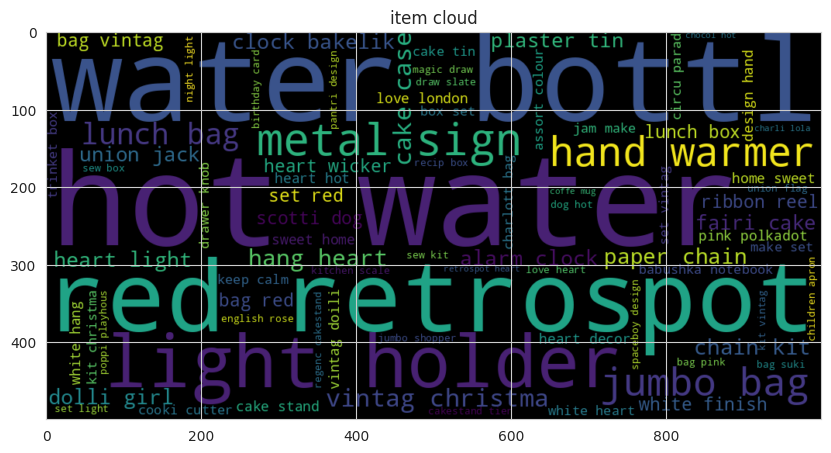

In [ ]:
plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=80,min_font_size=5)

# The syntax requires parameter as a body of text.
text = ' '.join(dec["clean"].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.title('item cloud')
plt.show()



In [ ]:
nov = df[df["Month"]==11]

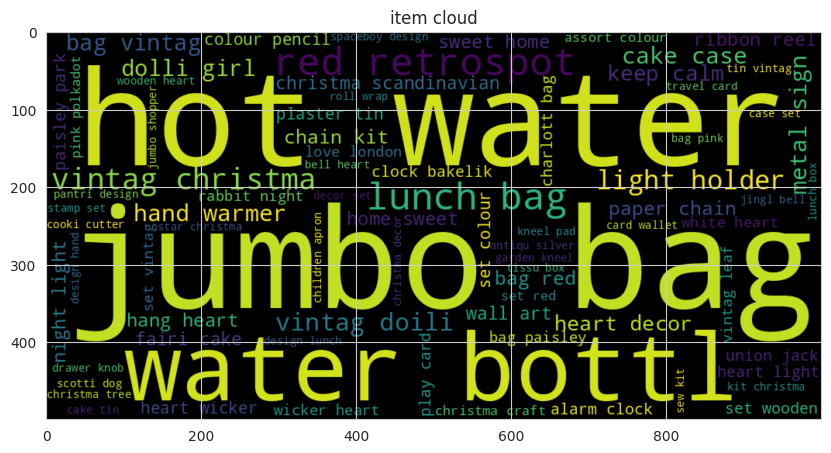

In [ ]:
plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=80,min_font_size=5)

# The syntax requires parameter as a body of text.
text = ' '.join(nov["clean"].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.title('item cloud')
plt.show()



In [ ]:
oct = df[df["Month"]==10]

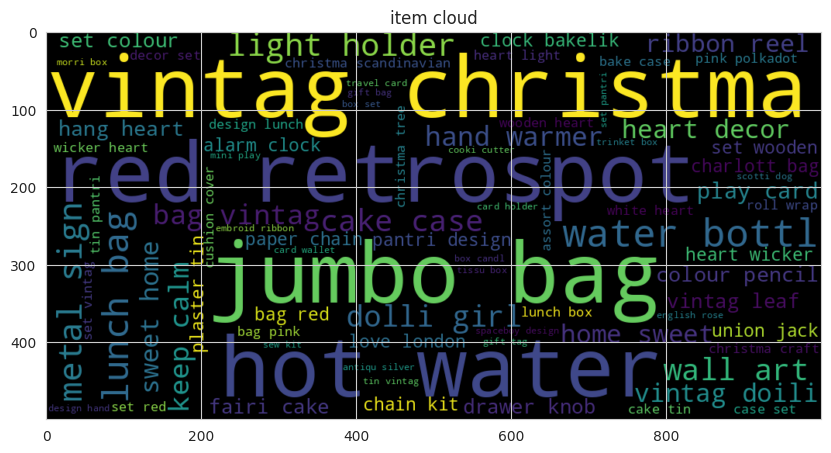

In [ ]:
plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=80,min_font_size=5)

# The syntax requires parameter as a body of text.
text = ' '.join(oct["clean"].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.title('item cloud')
plt.show()



In [ ]:
sep = df[df["Month"]==9]

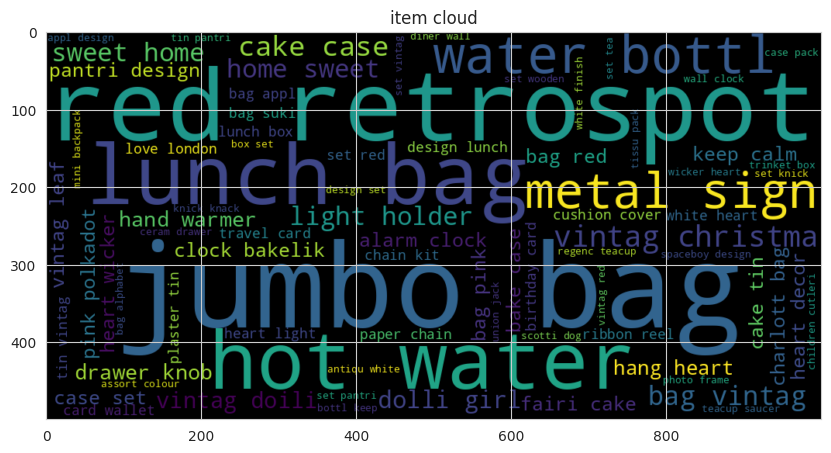

In [ ]:
plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=80,min_font_size=5)

# The syntax requires parameter as a body of text.
text = ' '.join(sep["clean"].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.title('item cloud')
plt.show()



In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  canceled  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     False   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     False   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     False   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     False   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     False   

   Revenue  Month  DayofWeek       Avg    Type  \
0    15.30     12          2  5.835017  Normal   
1    20.34     12          2  5.835017  Normal   
2    22.00     12          2  5.835017  Normal   
3    20.34     12          2  5.835017  Normal   
4    20.34     12          2  5.835017  Normal   

                             clean  
0    white hang heart light holder  
1              white metal lantern  
2    cream cupid heart coat hanger  
3  knit union flag hot water bottl  
4     red woolli hotti white heart

### Whole Saler Month

In [ ]:
sep1  = df[(df["Month"]==9)&(df['Type']=='WholeSaler')]

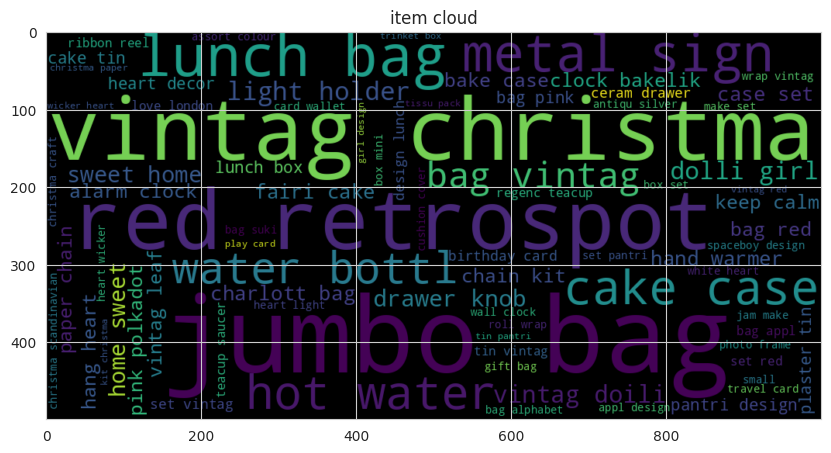

In [ ]:
plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=80,min_font_size=5)

# The syntax requires parameter as a body of text.
text = ' '.join(sep1["clean"].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.title('item cloud')
plt.show()

In [ ]:
oct1  = df[(df["Month"]==10)&(df['Type']=='WholeSaler')]

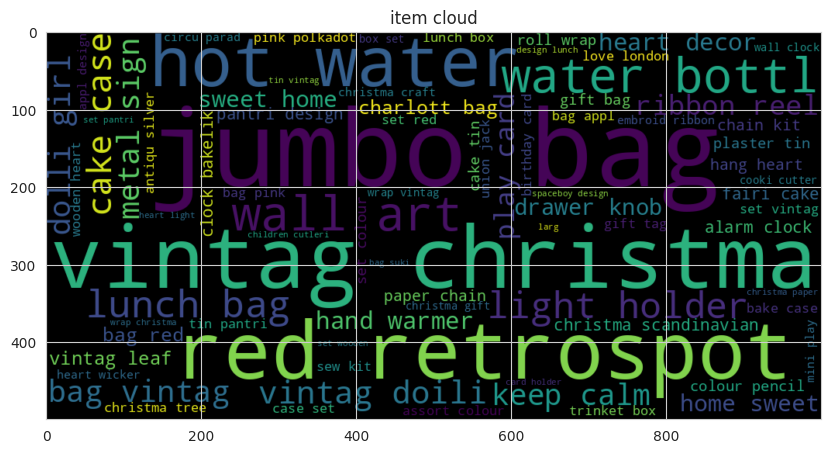

In [ ]:
plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=80,min_font_size=5)

# The syntax requires parameter as a body of text.
text = ' '.join(oct1["clean"].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.title('item cloud')
plt.show()

In [ ]:
nov1  = df[(df["Month"]==11)&(df['Type']=='WholeSaler')]

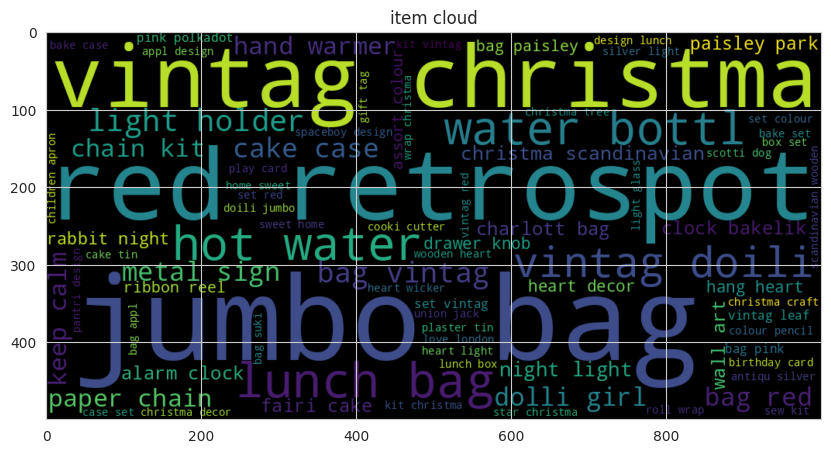

In [ ]:
plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=80,min_font_size=5)

# The syntax requires parameter as a body of text.
text = ' '.join(nov1["clean"].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.title('item cloud')
plt.show()

In [ ]:
dec1  = df[(df["Month"]==12)&(df['Type']=='WholeSaler')]

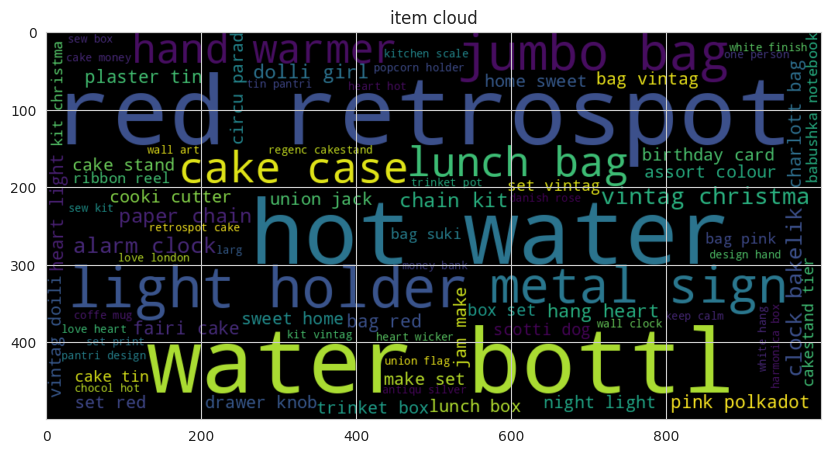

In [ ]:
plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=80,min_font_size=5)

# The syntax requires parameter as a body of text.
text = ' '.join(dec1["clean"].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.title('item cloud')
plt.show()

### Normal Month

In [ ]:
sep2  = df[(df["Month"]==9)&(df['Type']=='Normal')]

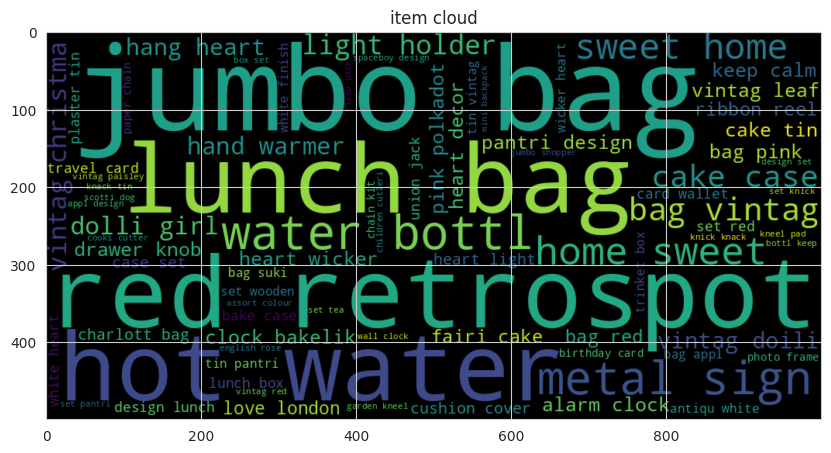

In [ ]:
plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=80,min_font_size=5)

# The syntax requires parameter as a body of text.
text = ' '.join(sep2["clean"].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.title('item cloud')
plt.show()

In [ ]:
oct2  = df[(df["Month"]==10)&(df['Type']=='Normal')]

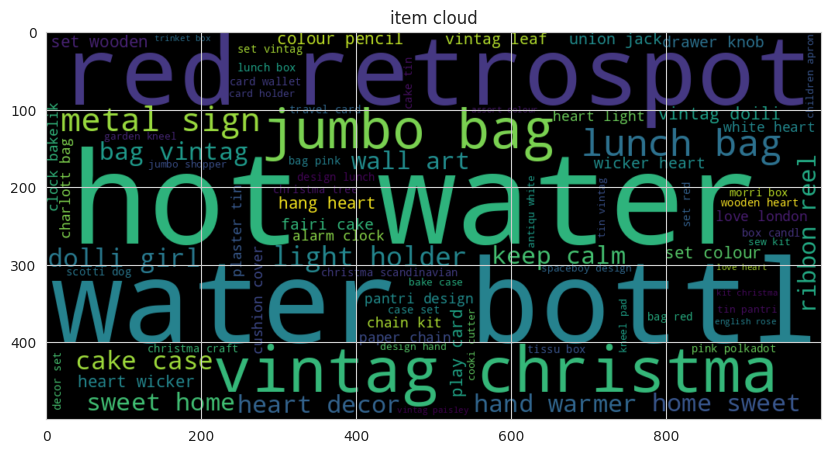

In [ ]:
plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=80,min_font_size=5)

# The syntax requires parameter as a body of text.
text = ' '.join(oct2["clean"].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.title('item cloud')
plt.show()

In [ ]:
nov2  = df[(df["Month"]==11)&(df['Type']=='Normal')]

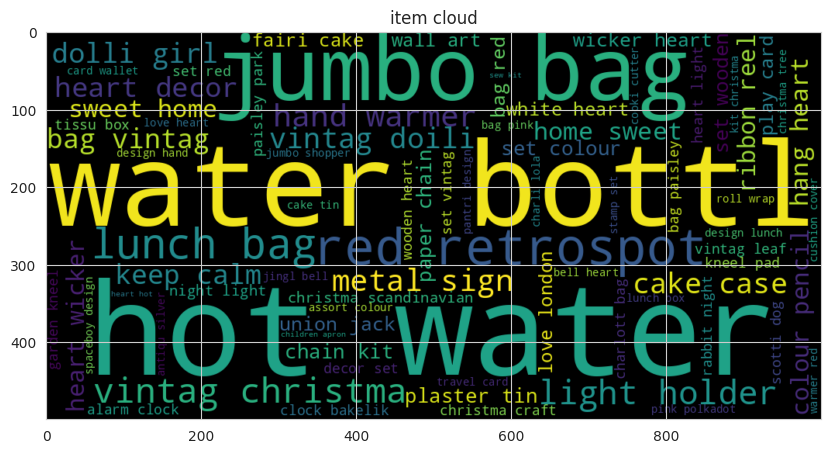

In [ ]:
plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=80,min_font_size=5)

# The syntax requires parameter as a body of text.
text = ' '.join(nov2["clean"].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.title('item cloud')
plt.show()

In [ ]:
dec2  = df[(df["Month"]==12)&(df['Type']=='Normal')]

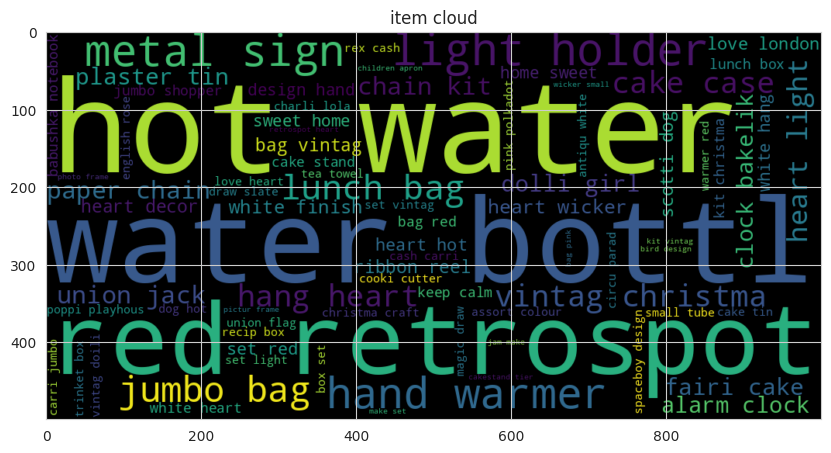

In [ ]:
plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=80,min_font_size=5)

# The syntax requires parameter as a body of text.
text = ' '.join(dec2["clean"].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.title('item cloud')
plt.show()

## Set & Cross-Selling

In [ ]:
#Check Christmas items sales
Dec25 = df[df.Description.str.contains('CHRISTMAS')].sort_values("StockCode",ascending =False)

In [ ]:
#Normal Customers
Dec251 = Dec25[Dec25["Type"]=="Normal"]

In [ ]:
Dec251.groupby("Month")['Quantity',"Revenue"].sum()

Quantity   Revenue
Month                    
1           305    284.09
2           114     78.36
3           296    159.60
4           134    138.83
5           218    352.92
6           532    511.50
7          1734   2077.10
8          2456   3196.11
9         10106  15351.12
10        22406  29335.71
11        29425  38207.05
12        12895  17950.55

In [ ]:
#Wholesalers
Dec252 = Dec25[Dec25["Type"]=="WholeSaler"]

In [ ]:
Dec252.groupby("Month")['Quantity',"Revenue"].sum()

Quantity   Revenue
Month                    
1           307    171.33
2           443    387.41
3           233    410.90
4            89    176.99
5           645    715.41
6          1752   2226.86
7          7155   9793.01
8         12721  19708.87
9         45891  62229.12
10        52232  63151.07
11        56447  71006.36
12        23125  30680.05

In [ ]:
#define set and pack
#set: same item diff color or diff item
#pack: same item same color
sett = df[df.Description.str.contains('SET')].sort_values("StockCode",ascending =False)

In [ ]:
packk = df[df.Description.str.contains('PACK')].sort_values("StockCode",ascending =False)

In [ ]:
#check sale n revenue

In [ ]:
sett['Quantity'].sum()

522460

In [ ]:
sett['Revenue'].sum()

1013142.8600000001

In [ ]:
packk['Quantity'].sum()

271995

In [ ]:
packk['Revenue'].sum()

163449.87999999998

In [ ]:
sett.groupby("Month")["Quantity",'Revenue'].sum()

Quantity    Revenue
Month                     
1         31056   68904.92
2         32664   64669.63
3         37953   76003.79
4         22948   45036.21
5         30903   63869.82
6         41705   84498.81
7         48207   80601.42
8         46382   85911.23
9         60323  117268.95
10        60388  107577.94
11        66895  129641.61
12        43036   89158.53

In [ ]:
#Christmas sets sales, no sets with diff items
sett[sett.Description.str.contains('CHRISTMAS')].sort_values("StockCode",ascending =False)['Description'].value_counts()

SET OF 20 VINTAGE CHRISTMAS NAPKINS    511
SET OF 6 RIBBONS VINTAGE CHRISTMAS     343
SET OF 2 CHRISTMAS DECOUPAGE CANDLE     96
SET OF 2 CERAMIC CHRISTMAS TREES        79
SET OF 2 CERAMIC CHRISTMAS REINDEER     79
SET/3 CHRISTMAS DECOUPAGE CANDLES       32
SET/9 CHRISTMAS T-LIGHTS SCENTED         8
SET OF 36 VINTAGE CHRISTMAS DOILIES      6
Name: Description, dtype: int64

In [ ]:
same = sett[sett.Description.str.contains('\d')].sort_values("StockCode",ascending =False)['Description'].value_counts().reset_index()

In [ ]:
diff = sett[sett['Description'].isin(same['index'])==False]

In [ ]:
same = sett[sett['Description'].isin(same['index'])]

In [ ]:
#sets with diff items compare to all sets
#number of sets
diff['Description'].nunique()/sett['Description'].nunique()

0.25862068965517243

In [ ]:
#Sales
diff['Quantity'].sum()/sett['Quantity'].sum()

0.24468476055583202

In [ ]:
#Revenue
diff['Revenue'].sum()/sett['Revenue'].sum()

0.24742877820804066

In [ ]:
same['number_of_item_in_set'] = same.Description.str.extract('(\d+)')

In [ ]:
same['number_of_item_in_set'] = same['number_of_item_in_set'].astype('int64')

<Axes: xlabel='Quantity', ylabel='number_of_item_in_set'>

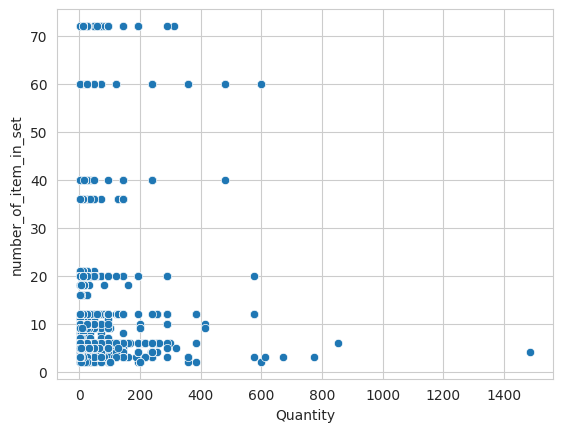

In [ ]:
sns.scatterplot(data=same, x="Quantity", y="number_of_item_in_set")

## Upselling

In [ ]:
#Check bag
up = df[df.Description.str.contains('BAG')]

In [ ]:
#number of items
up['Description'].nunique()

187

In [ ]:
up = up['UnitPrice'].value_counts().reset_index().sort_values("index",ascending=False)

In [ ]:
up["Type"] = up["index"].apply(lambda x: "Lowest" if x<6 else ("Low" if x<10 else ("Middle" if x <20 else "High") ))

In [ ]:
up

index  UnitPrice    Type
29  29.95         29    High
45  24.95          5    High
51  16.95          2  Middle
42  16.63          7  Middle
33  12.75         21  Middle
49   9.96          3     Low
20   8.95         85     Low
54   8.50          1     Low
36   8.29         13     Low
52   7.95          2     Low
55   7.65          1     Low
39   7.46          9     Low
34   5.95         18  Lowest
35   5.79         15  Lowest
37   4.96         13  Lowest
16   4.95        129  Lowest
9    4.25        678  Lowest
17   4.13        122  Lowest
26   3.95         34  Lowest
10   3.75        627  Lowest
31   3.39         23  Lowest
46   3.35          5  Lowest
38   3.29         12  Lowest
18   3.25        121  Lowest
8    2.95        755  Lowest
7    2.55        794  Lowest
22   2.46         55  Lowest
50   2.26          2  Lowest
12   2.25        342  Lowest
5    2.10        982  Lowest
1    2.08      10430  Lowest
53   2.04          1  Lowest
3    1.95       2173  Lowest
25   1.85         34  Lowest
6    1.79        805  Lowest
24   1.75         50  Lowest
23   1.74         50  Lowest
27   1.69         33  Lowest
0    1.65      12960  Lowest
21   1.63         78  Lowest
11   1.45        427  Lowest
4    1.25       1126  Lowest
32   1.06         22  Lowest
44   1.04          6  Lowest
2    0.85       4209  Lowest
30   0.83         25  Lowest
14   0.82        293  Lowest
47   0.79          4  Lowest
13   0.72        306  Lowest
19   0.65        116  Lowest
41   0.64          9  Lowest
15   0.42        287  Lowest
28   0.39         32  Lowest
43   0.36          7  Lowest
48   0.27          4  Lowest
40   0.19          9  Lowest

In [ ]:
#distribution
up['Type'].value_counts()/up.shape[0]

Lowest    0.785714
Low       0.125000
Middle    0.053571
High      0.035714
Name: Type, dtype: float64

## Customer Lifetime Value

In [ ]:
today_date = dt.datetime(2011,12,11)

In [ ]:
#create df
cltv_df = df.groupby("CustomerID").agg(
    {
        "InvoiceDate": [
            lambda x: (x.max() - x.min()).days,
            lambda x: (today_date - x.min()).days,
        ],
        "InvoiceNo": "nunique",
        "Revenue": "sum",
    }
)

cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ["recency", "T", "frequency", "monetary"]
cltv_df.head()

recency    T  frequency  monetary
CustomerID                                   
12346.0           0  326          1  77183.60
12347.0         365  368          7   4310.00
12348.0         282  359          4   1437.24
12349.0           0   19          1   1457.55
12350.0           0  311          1    294.40

In [ ]:
cltv_df.describe()

recency            T    frequency       monetary
count  4337.000000  4337.000000  4337.000000    4337.000000
mean    130.391054   223.796634     4.258474    2036.762496
std     132.061821   117.846383     7.680564    8960.999424
min       0.000000     1.000000     1.000000       3.750000
25%       0.000000   113.000000     1.000000     306.450000
50%      92.000000   249.000000     2.000000     668.140000
75%     252.000000   327.000000     5.000000    1645.480000
max     373.000000   374.000000   209.000000  279138.020000

In [ ]:
#Average Order Value
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

#Recency & Tenure
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

#Frequency
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

In [ ]:
#fit model
BGF = BetaGeoFitter(penalizer_coef=0.001)
BGF.fit(cltv_df["frequency"], cltv_df["recency"], cltv_df["T"])

<lifetimes.BetaGeoFitter: fitted with 2836 subjects, a: 0.12, alpha: 11.47, b: 2.48, r: 2.18>

In [ ]:
#Expected Number of Transactions/month
cltv_df['Expected Number of Transactions/month'] = BGF.conditional_expected_number_of_purchases_up_to_time(
    4, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
)

In [ ]:
#probability_alive
cltv_df['probability_alive'] = BGF.conditional_probability_alive(
     cltv_df["frequency"], cltv_df["recency"], cltv_df["T"])

In [ ]:
cltv_df.head()

recency          T  frequency    monetary  \
CustomerID                                                
12347.0     52.142857  52.571429          7  615.714286   
12348.0     40.285714  51.285714          4  359.310000   
12352.0     37.142857  42.428571          8  278.255000   
12356.0     43.142857  46.571429          3  829.143333   
12358.0     21.285714  21.571429          2  464.030000   

            Expected Number of Transactions/month  probability_alive  
CustomerID                                                            
12347.0                                  0.563158           0.985512  
12348.0                                  0.366762           0.934203  
12352.0                                  0.726683           0.965837  
12356.0                                  0.343388           0.965367  
12358.0                                  0.485664           0.966248

In [ ]:
#fit 2nd model
GGF = GammaGammaFitter(penalizer_coef=0.001)
GGF.fit(cltv_df["frequency"], cltv_df["monetary"])

<lifetimes.GammaGammaFitter: fitted with 2836 subjects, p: 12.19, q: 0.93, v: 12.13>

In [ ]:
#Expected avg Sales
cltv_df['Expected avg Sales'] = GGF.conditional_expected_average_profit(cltv_df["frequency"], cltv_df["monetary"])

In [ ]:
# check with historical data
cltv_df['Expected avg Sales'].mean()

422.77762155575437

In [ ]:
cltv_df['monetary'].mean()

418.5119489711478

In [ ]:
#predict clv
cltv_df['predicted_clv/month'] = GGF.customer_lifetime_value(BGF,
                                                       cltv_df["frequency"], cltv_df["recency"],
                                                       cltv_df["T"], cltv_df["monetary"],time=1,freq="W",
                                                       discount_rate=0.0025)

In [ ]:
#manual predict clv to check
cltv_df['manual_predicted_clv/month'] = cltv_df['Expected Number of Transactions/month']*cltv_df['Expected avg Sales']

In [ ]:
cltv_df.head(
)

recency          T  frequency    monetary  \
CustomerID                                                
12347.0     52.142857  52.571429          7  615.714286   
12348.0     40.285714  51.285714          4  359.310000   
12352.0     37.142857  42.428571          8  278.255000   
12356.0     43.142857  46.571429          3  829.143333   
12358.0     21.285714  21.571429          2  464.030000   

            Expected Number of Transactions/month  probability_alive  \
CustomerID                                                             
12347.0                                  0.563158           0.985512   
12348.0                                  0.366762           0.934203   
12352.0                                  0.726683           0.965837   
12356.0                                  0.343388           0.965367   
12358.0                                  0.485664           0.966248   

            Expected avg Sales  predicted_clv/month  \
CustomerID                                            
12347.0             617.977003           376.972175   
12348.0             362.887094           144.163884   
12352.0             279.981363           220.372053   
12356.0             834.856796           310.515633   
12358.0             471.510079           247.969831   

            manual_predicted_clv/month  
CustomerID                              
12347.0                     348.018925  
12348.0                     133.093345  
12352.0                     203.457643  
12356.0                     286.679572  
12358.0                     228.995634

## RFM

In [ ]:
#create df

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                    'InvoiceNo': lambda x: x.nunique(),
                                    'Revenue': lambda x: x.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']

rfm = rfm.reset_index()

rfm.head()

CustomerID  recency  frequency  monetary
0     12346.0      326          1  77183.60
1     12347.0        3          7   4310.00
2     12348.0       76          4   1437.24
3     12349.0       19          1   1457.55
4     12350.0      311          1    294.40

In [ ]:
#score
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:

    df_ = dataframe.copy()
    df_["recency_score"] = pd.qcut(df_["recency"], 5, labels=[5, 4, 3, 2, 1])
    df_["frequency_score"] = pd.qcut(
        df_["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    df_["monetary_score"] = pd.qcut(df_["monetary"], 5, labels=[1, 2, 3, 4, 5])
    df_["RFM_SCORE"] = df_["recency_score"].astype(str) + df_["frequency_score"].astype(
        str
    )

    return df_


rfm = get_rfm_scores(rfm)

In [ ]:
#segmentation
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

rfm.head()

CustomerID  recency  frequency  monetary recency_score frequency_score  \
0     12346.0      326          1  77183.60             1               1   
1     12347.0        3          7   4310.00             5               5   
2     12348.0       76          4   1437.24             2               4   
3     12349.0       19          1   1457.55             4               1   
4     12350.0      311          1    294.40             1               1   

  monetary_score RFM_SCORE      segment  
0              5        11  hibernating  
1              5        55    champions  
2              4        24      at_Risk  
3              4        41    promising  
4              2        11  hibernating

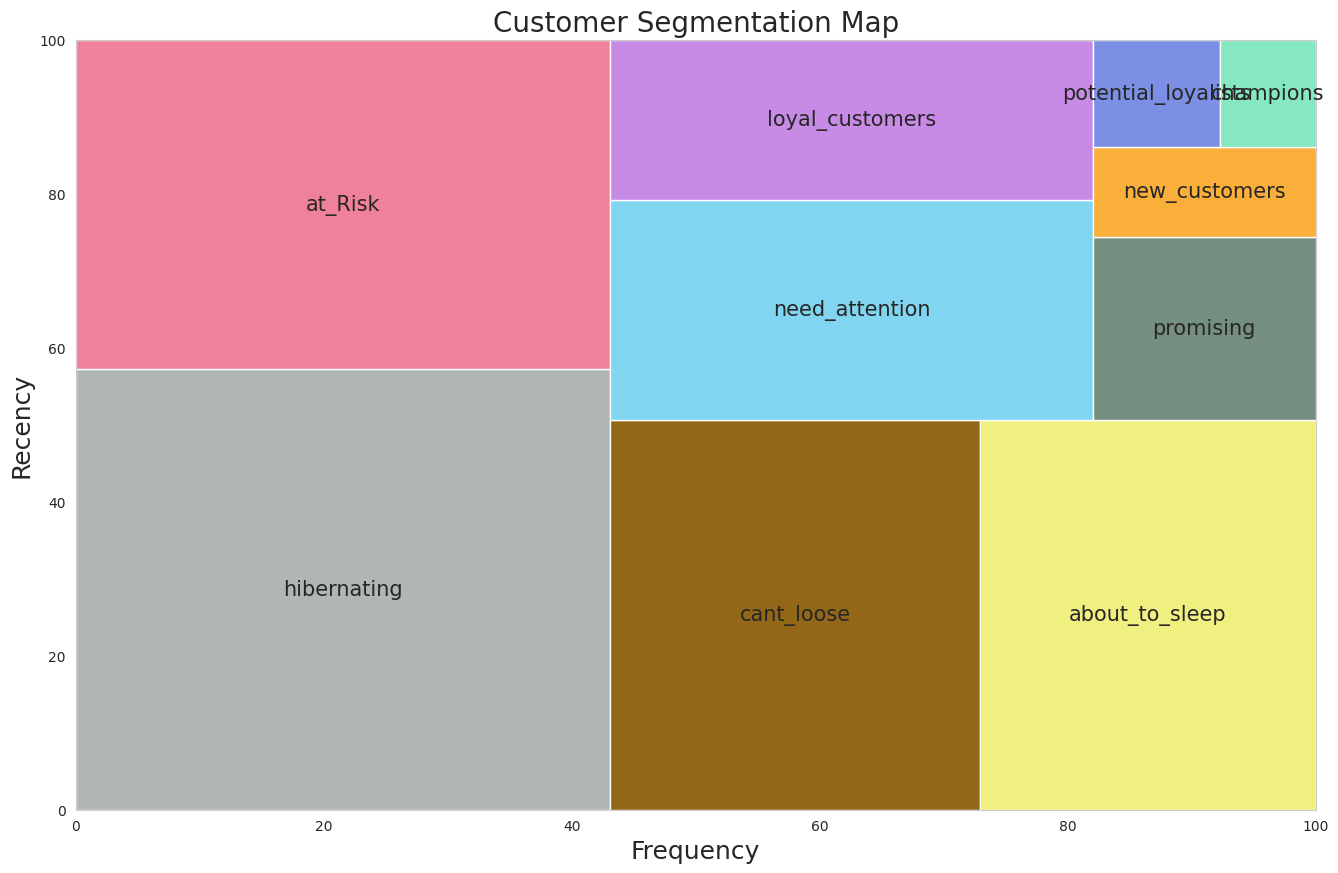

In [ ]:
#map
import squarify
segments = rfm["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()


In [ ]:
#model check
#Silhouette Score closer to 1 better
# Calinski Harabasz Score higher better
# Davies Bouldin Score closer to 0 better
print(' RFM Model Evaluation '.center(70, '='))
X = rfm[['recency_score', 'frequency_score']]
labels = rfm['segment']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

======================== RFM Model Evaluation ========================
Number of Observations: 4337
Number of Segments: 10
Silhouette Score: 0.472
Calinski Harabasz Score: 4625.87
Davies Bouldin Score: 0.632 


In [ ]:
rfm[['recency','monetary','frequency','segment']]\
.groupby('segment')\
.agg({'mean','std','max','min'})

recency                           monetary  \
                           std        mean min  max           std   
segment                                                             
about_to_sleep       10.920587   53.369318  34   72    524.629051   
at_Risk              68.717663  153.873737  73  374   2557.656505   
cant_loose           65.704064  133.370968  73  373   2104.639849   
champions             3.957204    6.674312   1   15  20005.963597   
hibernating          91.782108  217.681308  73  374   2416.357989   
loyal_customers      15.507822   34.171250  16   72   5908.601336   
need_attention       11.571248   52.356757  34   72   1098.905503   
new_customers         4.374893    8.234043   1   15    540.999210   
potential_loyalists   9.367027   17.398340   1   33   7671.640436   
promising             4.983514   23.824176  16   33    219.908555   

                                                     frequency                 \
                            mean     min        max        std       mean min   
segment                                                                         
about_to_sleep        462.994375    6.20    6207.67   0.360894   1.153409   1   
at_Risk              1084.575692   52.00   44534.30   0.952283   2.868687   2   
cant_loose           2801.324032   70.02   10254.18   4.290514   8.403226   6   
champions            6701.629388  201.12  279138.02  16.205932  12.244648   3   
hibernating           478.812048    3.75   77183.60   0.297631   1.098131   1   
loyal_customers      2812.459364   36.56  124564.53   4.470177   6.400000   3   
need_attention        891.572757    6.90   12601.83   0.467322   2.318919   2   
new_customers         361.115957   89.94    3861.00   0.000000   1.000000   1   
potential_loyalists  1035.129108   20.80  168472.50   0.651189   2.008299   1   
promising             291.617912   30.00    1457.55   0.000000   1.000000   1   

                          
                     max  
segment                   
about_to_sleep         2  
at_Risk                5  
cant_loose            34  
champions            209  
hibernating            2  
loyal_customers       62  
need_attention         3  
new_customers          1  
potential_loyalists    3  
promising              1

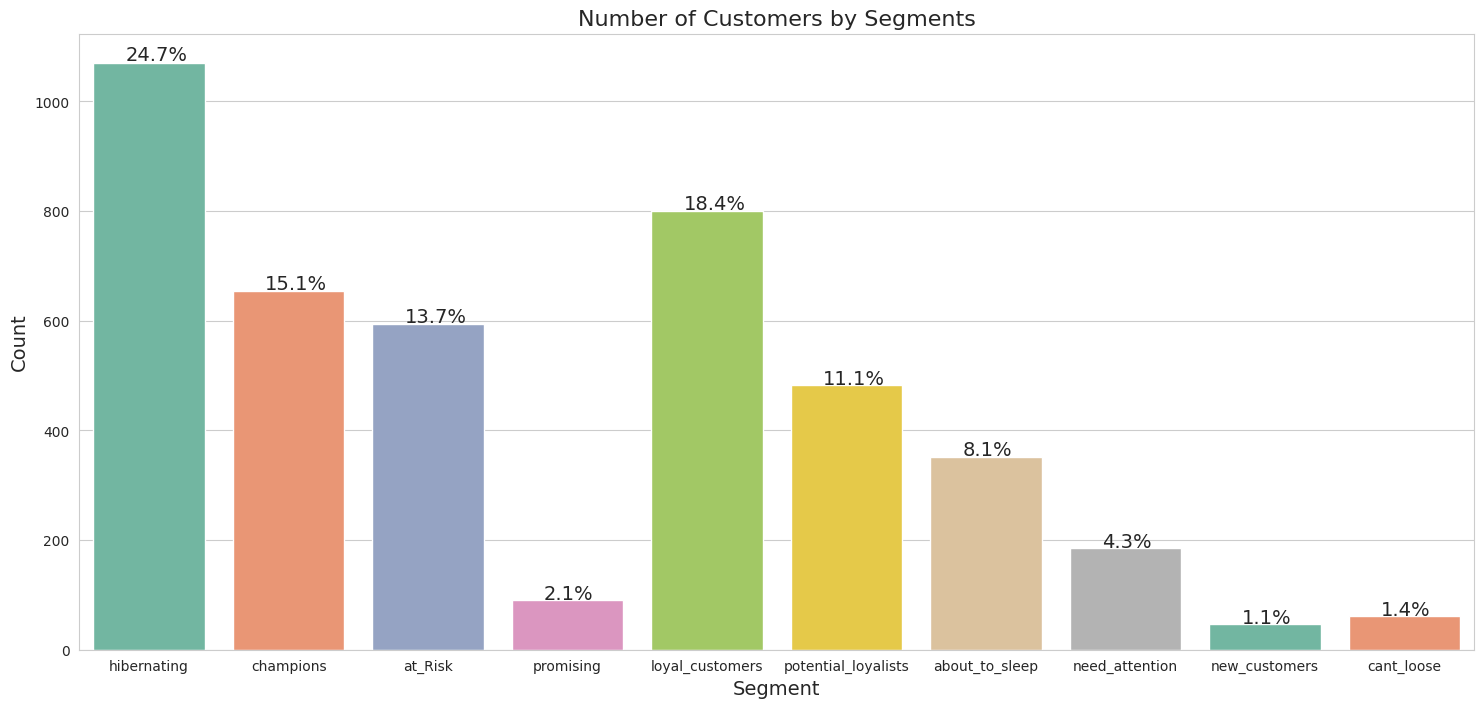

In [ ]:
#distribution
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

### RFM CLTV

In [ ]:
rfm_seg = cltv_df.merge(rfm[['CustomerID','segment']],how="left",left_index=True,right_on="CustomerID")

In [ ]:
rfm_seg = rfm_seg.set_index("CustomerID")

In [ ]:
rfm_seg

recency          T  frequency    monetary  \
CustomerID                                                
12347.0     52.142857  52.571429          7  615.714286   
12348.0     40.285714  51.285714          4  359.310000   
12352.0     37.142857  42.428571          8  278.255000   
12356.0     43.142857  46.571429          3  829.143333   
12358.0     21.285714  21.571429          2  464.030000   
...               ...        ...        ...         ...   
18272.0     34.857143  35.285714          6  513.096667   
18273.0     36.428571  36.857143          3   68.000000   
18282.0     16.857143  18.142857          2   89.025000   
18283.0     47.571429  48.285714         16  130.930000   
18287.0     22.571429  28.857143          3  612.426667   

            Expected Number of Transactions/month  probability_alive  \
CustomerID                                                             
12347.0                                  0.563158           0.985512   
12348.0                                  0.366762           0.934203   
12352.0                                  0.726683           0.965837   
12356.0                                  0.343388           0.965367   
12358.0                                  0.485664           0.966248   
...                                           ...                ...   
18272.0                                  0.684916           0.983384   
18273.0                                  0.415456           0.973330   
18282.0                                  0.538502           0.961023   
18283.0                                  1.202330           0.991725   
18287.0                                  0.480724           0.940754   

            Expected avg Sales  predicted_clv/month  \
CustomerID                                            
12347.0             617.977003           376.972175   
12348.0             362.887094           144.163884   
12352.0             279.981363           220.372053   
12356.0             834.856796           310.515633   
12358.0             471.510079           247.969831   
...                        ...                  ...   
18272.0             515.634153           382.504205   
18273.0              72.188020            32.482292   
18282.0              95.376600            55.612420   
18283.0             131.737586           171.567232   
18287.0             617.705798           321.587392   

            manual_predicted_clv/month              segment  
CustomerID                                                   
12347.0                     348.018925            champions  
12348.0                     133.093345              at_Risk  
12352.0                     203.457643      loyal_customers  
12356.0                     286.679572  potential_loyalists  
12358.0                     228.995634  potential_loyalists  
...                                ...                  ...  
18272.0                     353.166313            champions  
18273.0                      29.990930            champions  
18282.0                      51.360453  potential_loyalists  
18283.0                     158.392066            champions  
18287.0                     296.945713      loyal_customers  

[2836 rows x 10 columns]

In [ ]:
seg = rfm_seg.groupby('segment')['recency',	'T',	'frequency'	,'monetary'	,'Expected Number of Transactions/month'	,'probability_alive',	'Expected avg Sales'	,'predicted_clv/month',	'manual_predicted_clv/month'].mean().reset_index()

In [ ]:
seg

segment    recency          T  frequency    monetary  \
0       about_to_sleep  19.542328  27.222222   2.000000  404.103611   
1              at_Risk  18.022367  40.070467   2.868687  373.413502   
2           cant_loose  27.082949  46.207373   8.403226  345.110356   
3            champions  39.459589  40.482525  12.244648  425.436140   
4          hibernating  13.318367  38.336054   2.000000  399.912714   
5      loyal_customers  35.538036  40.491607   6.400000  400.049426   
6       need_attention  21.022394  28.569884   2.318919  372.602171   
7  potential_loyalists  20.477188  22.914734   2.272251  556.745593   

   Expected Number of Transactions/month  probability_alive  \
0                               0.428655           0.901628   
1                               0.255470           0.623267   
2                               0.412983           0.590636   
3                               1.085260           0.983641   
4                               0.201845           0.558486   
5                               0.643227           0.957394   
6                               0.464586           0.904574   
7                               0.613349           0.953389   

   Expected avg Sales  predicted_clv/month  manual_predicted_clv/month  
0          411.403357           189.407288                  174.916267  
1          378.932018           101.890875                   94.076496  
2          347.024480           158.310331                  146.159264  
3          427.491486           602.510403                  556.294919  
4          407.199849            94.196391                   86.975439  
5          402.923941           293.691455                  271.164822  
6          379.011976           197.638107                  182.529039  
7          563.844587           322.418748                  297.788832

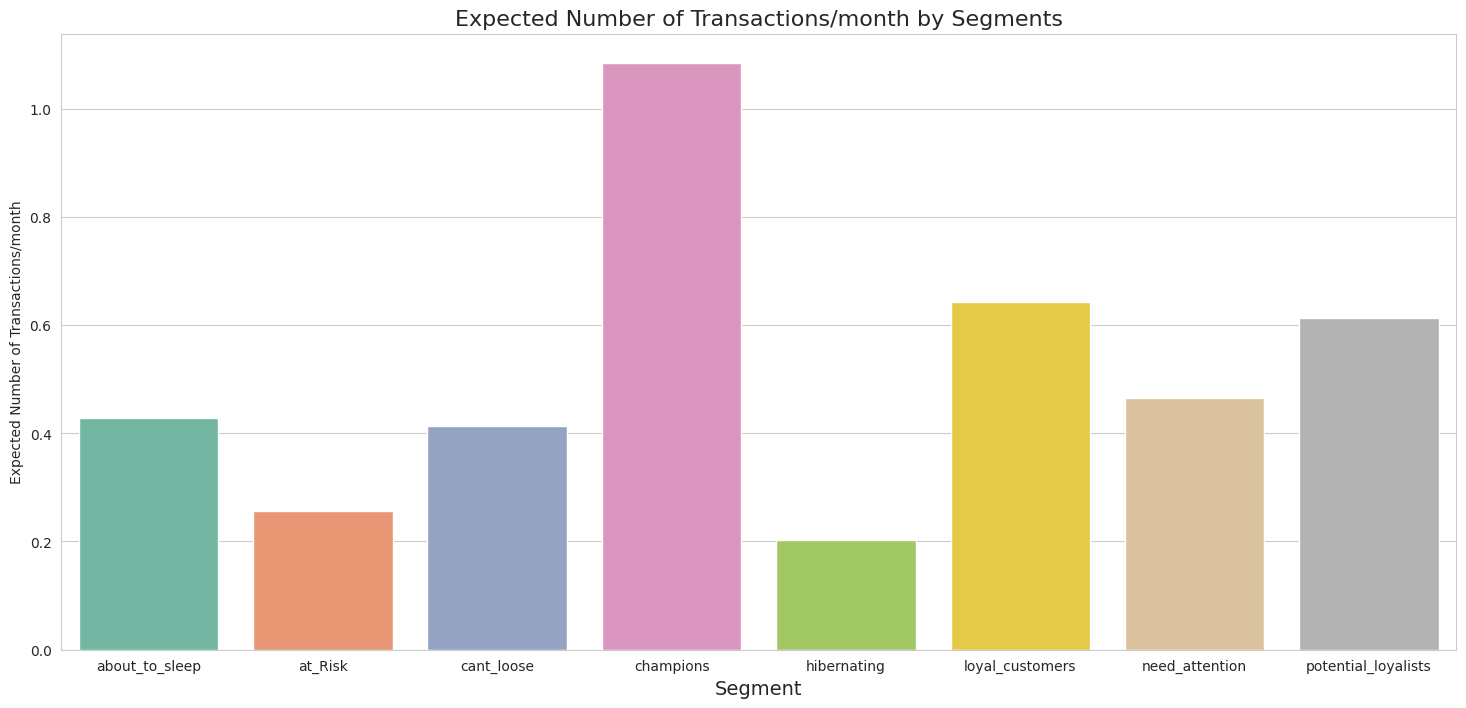

In [ ]:
plt.figure(figsize = (18, 8))
ax = sns.barplot(data = seg,
                   x = 'segment',
                   y = 'Expected Number of Transactions/month',
                   palette = palette)
plt.title('Expected Number of Transactions/month by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

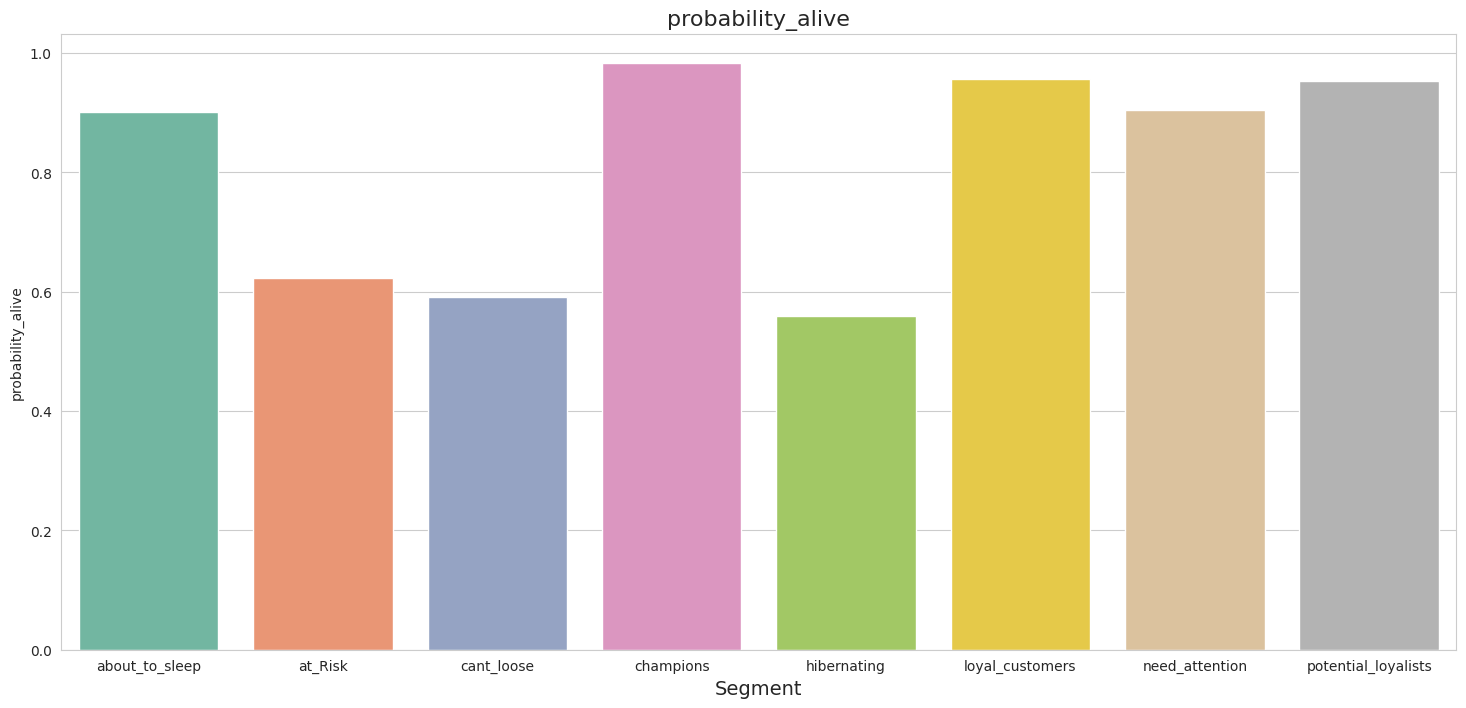

In [ ]:
plt.figure(figsize = (18, 8))
ax = sns.barplot(data = seg,
                   x = 'segment',
                   y = 'probability_alive',
                   palette = palette)
plt.title('probability_alive', size = 16)
plt.xlabel('Segment', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

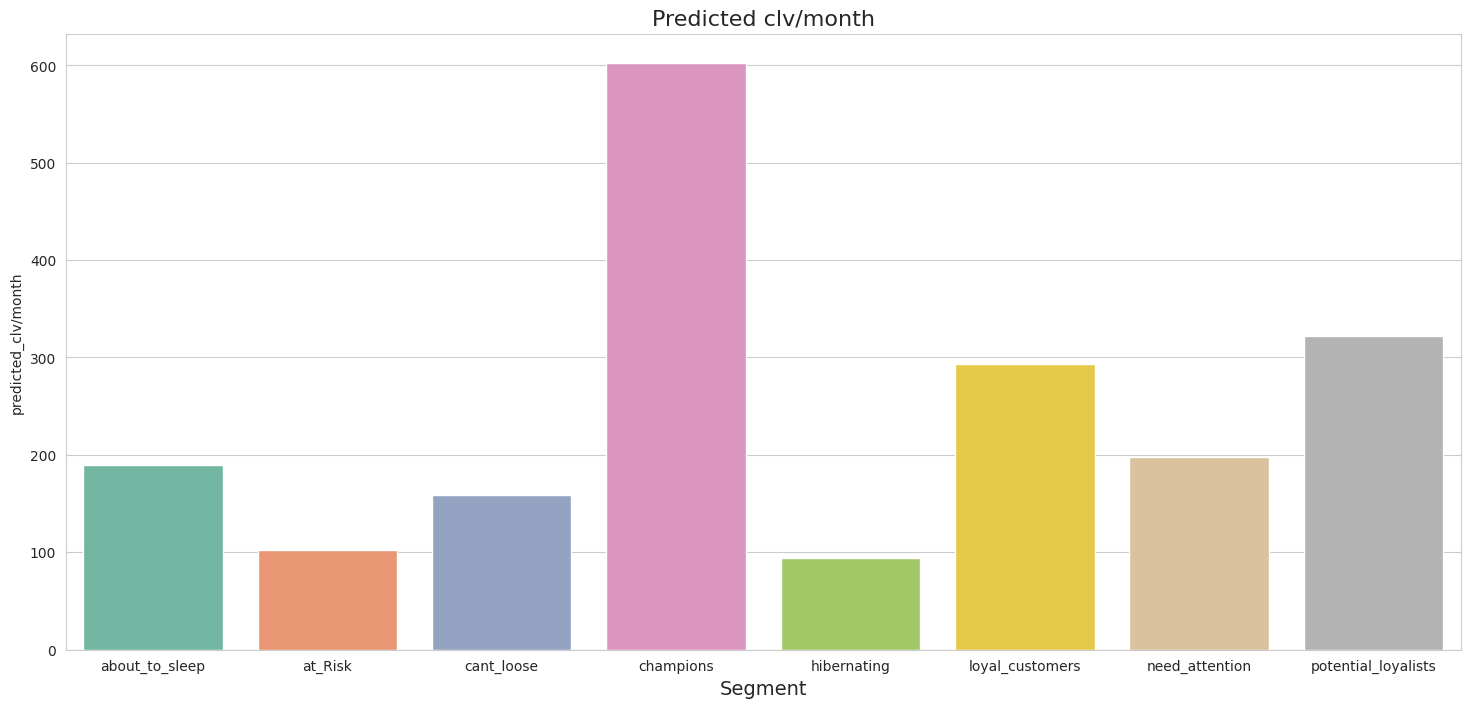

In [ ]:
plt.figure(figsize = (18, 8))
ax = sns.barplot(data = seg,
                   x = 'segment',
                   y = 'predicted_clv/month',
                   palette = palette)
plt.title('Predicted clv/month', size = 16)
plt.xlabel('Segment', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

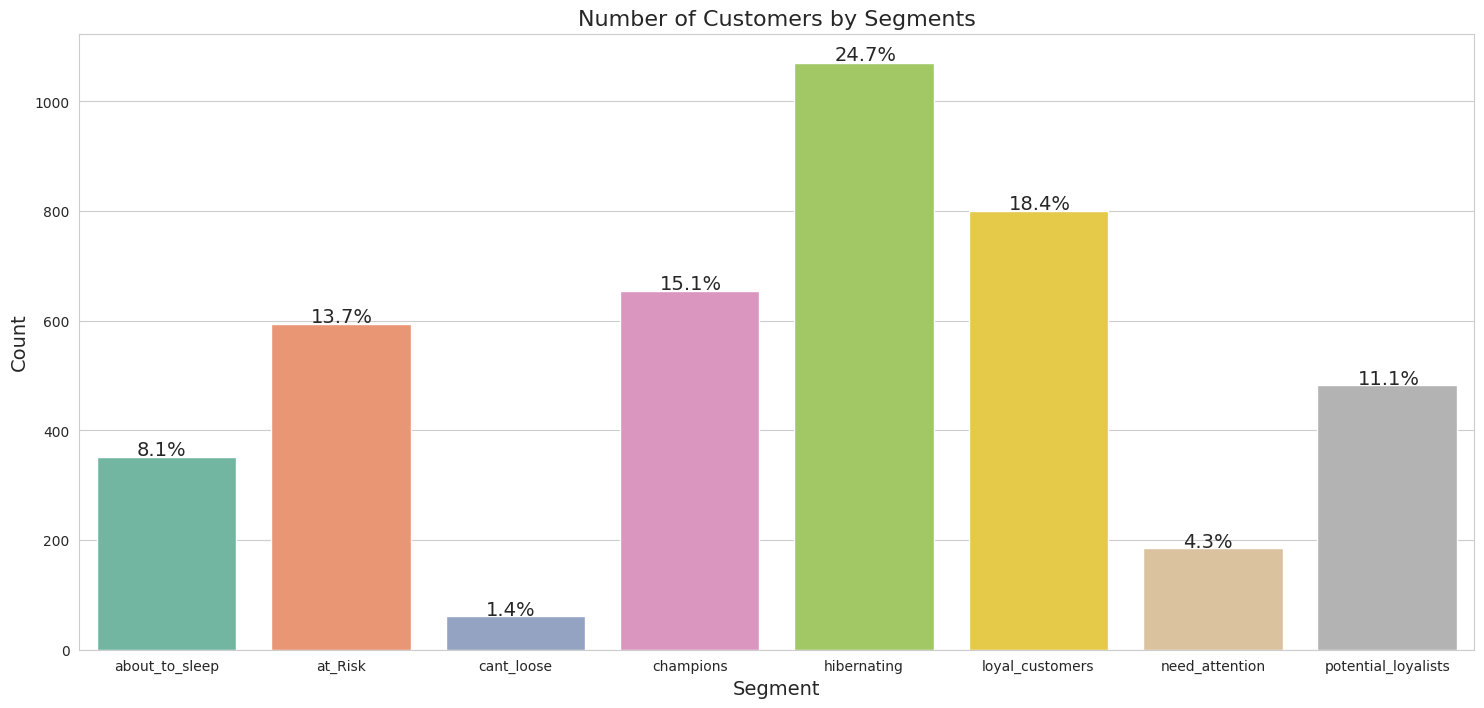

In [ ]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette,order = seg['segment'])
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

# Tableau

In [ ]:
df.to_csv("df1.csv",index=False)

In [ ]:
Dec251.to_csv("Dec251.csv",index=False)

In [ ]:
Dec252.to_csv("Dec252.csv",index=False)

In [ ]:
same.to_csv("same.csv",index=False)

In [ ]:
sett.to_csv("sett.csv",index=False)

In [ ]:
packk.to_csv("packk.csv",index=False)

In [ ]:
diff.to_csv("diff.csv",index=False)

In [ ]:
up.to_csv("up.csv",index=True)

In [ ]:
seg.to_csv("seg.csv",index=True)